# Import

In [1]:
import os
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

import random
import scipy.stats as ss

# Load dataset (TR81)

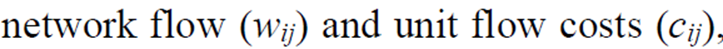

In [2]:
dir_name = os.path.dirname(os.path.realpath('__file__'))

file_name = 'TR81'
file_path = os.path.join(dir_name,file_name + '.csv')

# Load demand data
w = pd.read_csv(file_path,nrows=81,header=None)
w.index += 1
w.columns += 1

# Load unit cost data
c = pd.read_csv(file_path,skiprows = 82,nrows=81,header=None)
c.index += 1
c.columns += 1

In [3]:
w

1      2      3      4      5       6      7     8      9      10  ...  \
1       0  17493  22782  14827  10242  112387  48225  5382  26661  30183  ...   
2   17174      0   7544   4910   3391   37216  15969  1782   8828   9995  ...   
3   22429   7565      0   6412   4429   48604  20856  2328  11530  13053  ...   
4   14536   4903   6385      0   2871   31499  13516  1508   7472   8459  ...   
5   10016   3378   4400   2864      0   21706   9314  1039   5149   5829  ...   
..    ...    ...    ...    ...    ...     ...    ...   ...    ...    ...  ...   
77   4610   1555   2025   1318    910    9990   4287   478   2370   2683  ...   
78   6161   2078   2706   1761   1217   13350   5728   639   3167   3585  ...   
79   3135   1057   1377    896    619    6793   2915   325   1611   1824  ...   
80  12599   4250   5535   3602   2488   27303  11716  1308   6477   7333  ...   
81   8612   2905   3783   2462   1701   18663   8008   894   4427   5012  ...   

       72    73    74    75    76    77    78    79     80    81  
1   12808  9904  5165  3751  4729  4728  6312  3217  12865  8813  
2    4241  3280  1710  1242  1566  1565  2090  1065   4260  2918  
3    5539  4283  2234  1622  2045  2045  2730  1391   5564  3811  
4    3590  2776  1448  1051  1325  1325  1769   902   3606  2470  
5    2474  1913   997   724   913   913  1219   621   2485  1702  
..    ...   ...   ...   ...   ...   ...   ...   ...    ...   ...  
77   1138   880   459   333   420     0   561   286   1144   783  
78   1521  1176   613   446   562   562     0   382   1528  1047  
79    774   599   312   227   286   286   382     0    778   533  
80   3111  2406  1255   911  1149  1149  1533   782      0  2141  
81   2127  1645   858   623   785   785  1048   534   2136     0  

[81 rows x 81 columns]

In [4]:
c

1     2     3     4    5     6     7     8     9     10  ...    72    73  \
1     0   330   573   966  612   490   558  1046   893   895  ...   619   709   
2   330     0   903   648  636   757   888   766  1223  1225  ...   301   475   
3   573   903     0  1314  593   257   293  1256   352   322  ...  1192  1282   
4   966   648  1314     0  734  1057  1430   391  1652  1567  ...   369   428   
5   612   636   593   734    0   336   875   708   939   833  ...   802   986   
..  ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...   
77  893  1164   337  1359  625   407   600  1271   511   220  ...  1419  1583   
78  701   972   448  1099  365   215   735  1002   794   558  ...  1167  1351   
79  243   210   816   820  669   733   801   938  1136  1138  ...   473   563   
80   86   244   659   880  629   576   644   960   979   981  ...   533   623   
81  722   993   382  1188  454   236   645  1100   670   379  ...  1248  1412   

      74    75    76    77    78    79   80    81  
1    769  1048  1069   893   701   243   86   722  
2   1040   768   751  1164   972   210  244   993  
3    516  1367  1424   337   448   816  659   382  
4   1169   306   143  1359  1099   820  880  1188  
5    435   787   844   625   365   669  629   454  
..   ...   ...   ...   ...   ...   ...  ...   ...  
77   374  1382  1469     0   350  1136  979   171  
78    84  1113  1209   350     0   944  787   179  
79  1012   940   923  1136   944     0  157   965  
80   855   962   983   979   787   157    0   808  
81   203  1211  1298   171   179   965  808     0  

[81 rows x 81 columns]

## Predefined Functions

In [5]:
def check_feasibility(array, n, p):
        flag = True
        hubs = list(set(array))
        for i in range(n):
            if i+1 in hubs:
                if array[i] == i+1:
                    flag *= True
                else:
                    flag *= False
        return flag

## initial solution

In [6]:
def initial_solution(n, p):  
    
    hubs = random.sample(range(1,n),p)
    array = [None] * n
    for i in range(n):
        if i+1 in hubs:
            array[i] = i+1    
        else:
            array[i] = hubs[random.randint(0,p-1)]
    return array

In [7]:
np.random.seed(5)
# test
initial_solution(81, 5)

[59,
 60,
 60,
 14,
 59,
 59,
 60,
 14,
 9,
 59,
 9,
 9,
 39,
 14,
 60,
 60,
 9,
 14,
 60,
 14,
 60,
 39,
 60,
 59,
 59,
 59,
 39,
 39,
 39,
 60,
 9,
 59,
 9,
 14,
 59,
 14,
 39,
 60,
 39,
 14,
 14,
 14,
 14,
 59,
 14,
 14,
 14,
 59,
 59,
 9,
 9,
 39,
 9,
 39,
 39,
 14,
 39,
 39,
 59,
 60,
 59,
 14,
 14,
 60,
 14,
 39,
 14,
 39,
 9,
 59,
 14,
 14,
 9,
 59,
 14,
 39,
 59,
 60,
 59,
 14,
 39]

## solution evaluation (cost calculation)

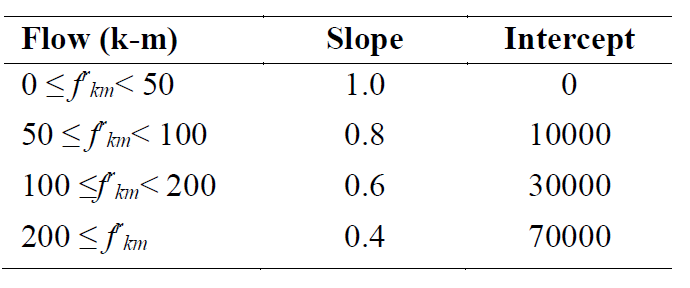

In [8]:
def flowloc_cost_2(flow):
    unit_flow_cost = 0
    
    if flow <0:
        raise ValueError("Flow must be nonnegative")
    elif flow < 50000:
        unit_flow_cost = 0 + 1* flow
    elif flow < 100000:
        unit_flow_cost = 10000 + 0.8* flow
    elif flow < 200000:
        unit_flow_cost = 30000 + 0.6* flow
    else:
        unit_flow_cost = 70000 + 0.4* flow
    return unit_flow_cost


def cost_evaluation(array, w, c):
    total_cost = 0
    
    # identify the hubs
    hubs = set(array)
    
    # calculate collection and distribution cost
    for i in range(1, len(array)+1):
        for j in range(1, len(array)+1):
            total_cost += w[i][j]*(c[i][array[i-1]] + c[array[j-1]][j])
    
    # calculate inter-hub cost
    for k in hubs:
        for m in hubs:
            if k != m:
                interhub_flow = 0
                for i in range(1, len(array)+1):
                    for j in range(1, len(array)+1):
                        if array[i-1] == k and array[j-1] == m:
                            interhub_flow += w[i][j]                   # calculate inter-hub flow
                            
                total_cost += flowloc_cost_2(interhub_flow) * c[k][m]  # calculate inter-hub cost
                
    return total_cost

# GA

## class

In [9]:
iterations = 100

In [10]:
class Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def ga(self):
        while True:
            parent_1 = initial_solution(self.n, self.p)
            parent_2 = initial_solution(self.n, self.p)

            cutting_point = random.randint(0, 9)
            offspring = parent_1[:cutting_point] + parent_2[cutting_point:]

            if len(set(offspring)) == self.p and check_feasibility(offspring, self.n, self.p):
                break

        return offspring
    
    def ga_best(self):
        ga_initial = self.ga()
        best_ga = ga_initial
        best_ga_cost = cost_evaluation(ga_initial, w, c)

        i = 1
        while i < iterations:
            next_solution = self.ga()
            ga_cost = cost_evaluation(next_solution, w, c)

            if ga_cost < best_ga_cost:
                best_ga = next_solution
                best_ga_cost= ga_cost

            i += 1

        return best_ga, best_ga_cost

In [11]:
time_start = time.time()  

first_ga = Ga(81, 5)
print(first_ga.ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([80, 19, 19, 6, 6, 6, 68, 80, 68, 80, 80, 6, 68, 80, 19, 16, 16, 16, 19, 19, 6, 80, 68, 19, 6, 19, 6, 68, 6, 16, 80, 19, 19, 16, 68, 6, 6, 80, 68, 68, 16, 80, 80, 19, 80, 80, 80, 68, 68, 16, 80, 80, 68, 6, 16, 68, 68, 6, 19, 80, 68, 80, 16, 80, 16, 19, 68, 68, 68, 80, 68, 6, 6, 6, 19, 6, 19, 19, 80, 80, 6], 80609058509.40001)
14.379996538162231


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (81, 5)

In [28]:
iterations = 1100

In [29]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(81, 5).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time() 
time_sum = time_end - time_start  
print(time_sum)

([19, 50, 50, 6, 50, 6, 50, 71, 14, 14, 71, 19, 50, 14, 6, 6, 14, 6, 19, 19, 14, 50, 6, 50, 50, 19, 6, 19, 71, 19, 50, 19, 71, 6, 71, 14, 71, 6, 19, 14, 19, 71, 71, 71, 19, 6, 71, 50, 50, 50, 19, 14, 14, 50, 19, 14, 14, 19, 14, 71, 14, 6, 6, 50, 6, 50, 19, 71, 50, 50, 71, 71, 50, 6, 6, 19, 71, 19, 50, 71, 19], 76148361776.20001)
([66, 37, 71, 15, 15, 71, 15, 37, 33, 37, 71, 33, 66, 15, 15, 15, 37, 33, 37, 15, 33, 37, 33, 15, 66, 33, 33, 66, 33, 37, 71, 37, 33, 37, 71, 71, 37, 66, 37, 33, 66, 15, 37, 37, 15, 66, 66, 15, 33, 66, 66, 37, 66, 15, 66, 66, 37, 66, 71, 71, 33, 66, 66, 37, 66, 66, 71, 37, 66, 37, 71, 71, 15, 71, 15, 33, 15, 66, 37, 15, 33], 77605078370.00002)
([79, 35, 16, 16, 7, 16, 7, 35, 7, 35, 50, 35, 50, 50, 50, 16, 79, 50, 35, 50, 79, 35, 50, 16, 16, 50, 50, 16, 35, 7, 79, 79, 7, 16, 35, 16, 16, 7, 50, 50, 16, 50, 16, 35, 16, 7, 50, 16, 79, 50, 50, 16, 79, 7, 16, 7, 79, 50, 79, 50, 7, 79, 79, 35, 50, 50, 35, 16, 7, 50, 79, 16, 79, 7, 50, 35, 50, 35, 79, 79, 35], 79185046

In [30]:
sum_NC/10

77005790475.04001

### (81, 7)

In [31]:
iterations = 900

In [32]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(81, 7).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([40, 40, 68, 68, 44, 40, 7, 7, 42, 68, 44, 16, 68, 7, 42, 16, 68, 33, 16, 42, 33, 16, 42, 33, 33, 42, 7, 40, 44, 42, 7, 16, 33, 16, 44, 7, 33, 40, 16, 40, 68, 42, 42, 44, 40, 44, 68, 42, 44, 33, 44, 16, 16, 16, 44, 42, 40, 44, 42, 33, 44, 33, 40, 33, 44, 16, 16, 68, 33, 33, 7, 68, 68, 7, 44, 16, 7, 40, 7, 33, 16], 78239185261.00002)
([6, 80, 11, 6, 34, 6, 80, 67, 18, 67, 11, 67, 6, 18, 60, 11, 67, 18, 34, 18, 60, 34, 18, 34, 60, 6, 18, 11, 18, 18, 34, 6, 34, 34, 34, 34, 6, 11, 18, 6, 6, 34, 6, 18, 18, 34, 80, 60, 60, 11, 18, 60, 80, 67, 18, 60, 6, 60, 11, 60, 11, 6, 67, 6, 18, 60, 67, 67, 18, 34, 18, 11, 34, 6, 18, 80, 11, 67, 18, 80, 11], 76643880804.80002)
([40, 46, 46, 34, 68, 66, 40, 34, 40, 66, 58, 40, 66, 58, 40, 40, 34, 40, 40, 58, 68, 46, 46, 26, 34, 26, 46, 46, 66, 34, 66, 26, 68, 34, 40, 58, 40, 66, 68, 40, 66, 58, 40, 40, 58, 46, 58, 26, 68, 26, 46, 26, 40, 40, 26, 26, 66, 58, 40, 40, 58, 66, 40, 34, 68, 66, 66, 68, 34, 66, 68, 26, 26, 68, 68, 26, 66, 46, 26, 68, 58], 77122

In [33]:
sum_NC/10

79084357780.26001

# HPSO 

## class

In [18]:
SwarmSize = 10

In [19]:
class Pso_Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def pso(self):
        first_row = [None] * self.n
        for i in range(self.n):
            first_row[i] = float("%.2f" %(random.random() + random.randint(0 , self.n*self.p)))

        second_row = [None] * self.n
        for i in range(self.n):
            second_row[i] = random.randint(1, self.p)

        array = [None] * self.n
        ranks_first_row = list(ss.rankdata(first_row))
        hubs = [int(i) for i in ranks_first_row][:self.p]  
        allocations = second_row

        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1    
            else:
                array[i] = hubs[allocations[i]-1]

        return array, hubs, allocations
    
    
    def cross_over(self):
        particle_1 = self.pso()
        particle_2 = self.pso()

        hubs = particle_1[1]
        allocations = particle_1[2][:round(self.n/2)] + particle_2[2][round(self.n/2):]
        array = [None] * self.n

        
        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1    
            else:
                array[i] = hubs[allocations[i] -1]

        return array, hubs, allocations
    
    
    def pso_ga_best(self):        
        pso_ga_initial = self.cross_over()[0]
        best_pso_ga = pso_ga_initial
        best_pso_ga_cost = cost_evaluation(pso_ga_initial, w, c)

        j = 1
        while j < SwarmSize:
            next_solution = self.cross_over()[0]
            pso_ga_cost = cost_evaluation(next_solution, w, c)

            if pso_ga_cost < best_pso_ga_cost:
                best_pso_ga = next_solution
                best_pso_ga_cost= pso_ga_cost

            j += 1

        return best_pso_ga, best_pso_ga_cost

In [27]:
time_start = time.time()  

first_pso_ga = Pso_Ga(81, 5)
print(first_pso_ga.pso_ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([16, 38, 19, 38, 55, 34, 34, 19, 38, 34, 38, 55, 34, 38, 55, 16, 16, 38, 19, 38, 16, 19, 38, 34, 16, 16, 55, 19, 16, 55, 38, 55, 16, 34, 34, 19, 34, 38, 38, 16, 16, 19, 16, 16, 34, 16, 19, 19, 38, 16, 34, 34, 38, 34, 55, 19, 55, 38, 55, 38, 19, 16, 55, 38, 19, 19, 19, 19, 19, 55, 55, 34, 38, 16, 19, 34, 55, 16, 34, 16, 19], 81571373734.39998)
20.028998136520386


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (81, 5)

In [34]:
SwarmSize = 900

In [35]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(81, 5).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([34, 34, 68, 14, 5, 34, 14, 34, 68, 34, 71, 68, 34, 14, 34, 5, 71, 71, 71, 71, 68, 68, 34, 71, 5, 5, 5, 5, 14, 5, 14, 5, 68, 34, 34, 68, 68, 71, 71, 34, 14, 68, 14, 34, 71, 71, 5, 14, 5, 14, 5, 68, 71, 5, 68, 14, 34, 68, 68, 14, 71, 68, 71, 5, 68, 5, 34, 68, 34, 34, 71, 14, 71, 14, 71, 71, 68, 5, 68, 68, 71], 80164804962.59999)
([50, 71, 68, 44, 68, 71, 68, 44, 66, 44, 50, 50, 50, 44, 71, 50, 44, 50, 71, 50, 68, 71, 71, 68, 66, 71, 68, 66, 66, 68, 44, 68, 68, 71, 50, 66, 66, 50, 50, 66, 71, 68, 68, 44, 66, 68, 50, 50, 50, 50, 44, 66, 68, 66, 71, 44, 66, 66, 66, 66, 68, 44, 71, 50, 68, 66, 44, 68, 66, 50, 71, 50, 50, 50, 68, 71, 44, 50, 66, 50, 44], 75448433669.99998)
([68, 68, 37, 66, 68, 6, 37, 37, 68, 6, 6, 6, 6, 37, 37, 66, 18, 18, 18, 6, 66, 18, 37, 68, 18, 37, 18, 37, 6, 18, 37, 66, 37, 18, 6, 68, 37, 66, 6, 68, 6, 68, 6, 6, 68, 6, 6, 37, 37, 37, 66, 66, 6, 18, 18, 68, 18, 66, 6, 18, 66, 18, 68, 68, 66, 66, 66, 68, 18, 66, 66, 18, 18, 37, 6, 18, 66, 18, 66, 6, 68], 75557012736.59

In [36]:
sum_NC/10

76699018719.1

### (81, 7)

In [37]:
SwarmSize = 850

In [38]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(81, 7).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([68, 34, 64, 20, 41, 34, 68, 54, 68, 54, 68, 64, 80, 68, 54, 54, 64, 54, 64, 20, 80, 41, 54, 80, 54, 34, 20, 68, 34, 64, 68, 80, 68, 34, 41, 41, 41, 20, 41, 68, 41, 64, 41, 20, 34, 20, 41, 68, 80, 20, 68, 41, 54, 54, 20, 34, 41, 68, 54, 80, 41, 41, 68, 64, 68, 20, 41, 68, 54, 80, 41, 80, 41, 64, 20, 64, 20, 80, 68, 80, 80], 78353880704.6)
([1, 1, 43, 40, 40, 6, 40, 40, 40, 43, 43, 6, 46, 1, 40, 45, 43, 1, 45, 46, 40, 6, 31, 1, 40, 45, 31, 46, 40, 31, 31, 45, 46, 6, 43, 46, 31, 45, 45, 40, 31, 6, 43, 6, 45, 46, 46, 43, 31, 46, 40, 46, 43, 43, 43, 6, 46, 6, 46, 31, 40, 40, 6, 31, 45, 1, 46, 40, 1, 45, 45, 1, 43, 31, 40, 31, 1, 1, 6, 6, 43], 78838702251.79999)
([68, 68, 68, 67, 55, 55, 68, 81, 67, 81, 54, 81, 42, 67, 55, 67, 67, 54, 78, 42, 81, 81, 42, 54, 42, 42, 81, 67, 68, 81, 78, 54, 68, 81, 81, 55, 67, 68, 78, 78, 67, 42, 42, 55, 68, 55, 42, 54, 67, 68, 68, 55, 81, 54, 55, 78, 68, 55, 55, 55, 54, 68, 54, 67, 78, 81, 67, 68, 42, 68, 55, 78, 78, 54, 67, 67, 42, 78, 81, 54, 81], 774519

In [39]:
sum_NC/10

78703544247.23999